In [16]:
from __future__ import print_function
__author__= 'My, Ramda, Siying'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import csv
import os
import scipy.stats as stats
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# 1. Idea:
Stations closer to parks (distance within 0.5 mile) tend to have higher frequency of Citibike usage.

# 2. Null Hypothesis:
The frequency of Citibiki usage for staions with distance of more than 0.5 mile from each corresponding park is the same or higher than the frequency for staions within 0.5 mile of the park, with signigicance level of $a=0.05$

# 3. Confidence level: 0.5

Since our type of outcome measure is interval, and it is multi-variate, we decided to use regression analysis. 


# 4. Mangle with data

In [18]:
# Counting frequencies

f = open('distance-all.csv', "rb+")
reader = csv.reader(f)
mydata = np.genfromtxt('distance-all.csv', delimiter = ',', names = True, dtype = None)

# initialization for all counts
obs_1 = 0 # stations within 0.1 mile
obs_3 = 0 # stations within 0.1-0.3 mile
obs_5 = 0 # stations within 0.3-0.5 mile
obs_near = 0 # for all stations within 0.5 mile
obs_far = 0 # for all stations outside the range of 0.5 mile

dis_near = []
dis_far = []
frq_near = []
frq_far = []

for i in range(0, len(mydata)):
    distance, freq = mydata[i][-2], mydata[i][-1]
    if distance >= 0.5:
        obs_far += freq
        dis_far.append(distance)
        frq_far.append(freq)
    else:
        dis_near.append(distance)
        frq_near.append(freq)
        if distance <= 0.1:
            obs_1 += freq
        else:
            if distance <=0.3:
                obs_3 += freq
            else:
                obs_5 += freq

obs_near = obs_1+obs_3+obs_5
dt_size = len(mydata)

print (obs_1, obs_3, obs_5, obs_far, obs_near, dt_size)

264145 1364457 733916 348594 2362518 465


### Frequency summary:

|   Distance   |    < 0.1 mile   |   0.1-0.3 mile    |   0.3-0.5 mile | total <=0.5 mile |   >0.5 mile
|---------------------------|----------------|----------|------|---------|-------|
|   Frequency  |  264145    |  1364457   | 733916  |   2362518     |   348594|

### Data visualization:

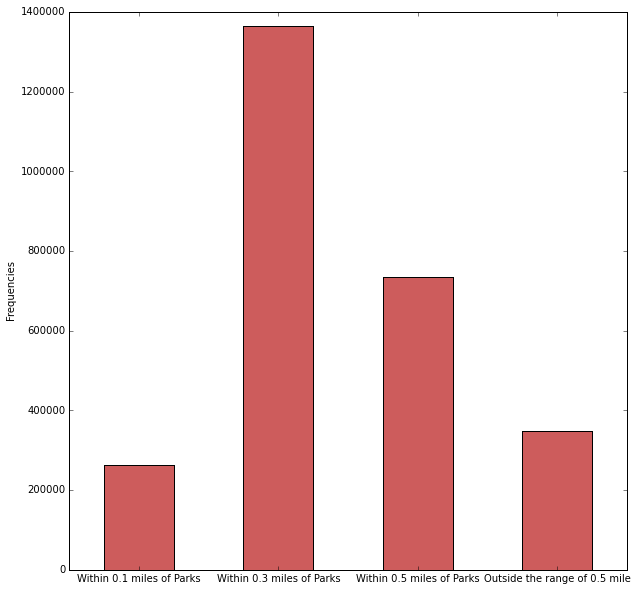

In [19]:
fig = plt.figure(figsize(10,10))
ax = fig.add_subplot(111)

xbar = [1,2,3,4]
value = [obs_1, obs_3, obs_5, obs_far]

labels = ["Within 0.1 miles of Parks", "Within 0.3 miles of Parks", "Within 0.5 miles of Parks", "Outside the range of 0.5 mile"]

plt.bar(xbar, value, align = 'center', color = 'IndianRed', width=0.5)
plt.xticks(xbar, labels)
ax.set_ylabel ('Frequencies')

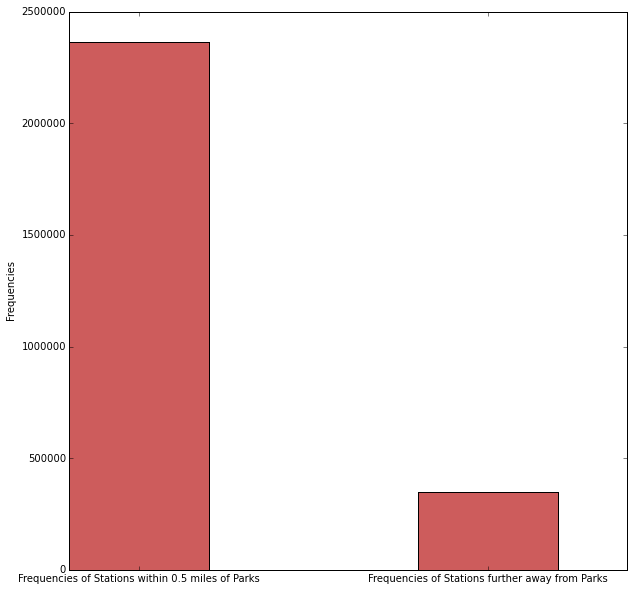

In [20]:
fig = plt.figure(figsize(10,10))
ax = fig.add_subplot(111)

xbar = [1,2]
value = [obs_near, obs_far]

labels = ["Frequencies of Stations within 0.5 miles of Parks", "Frequencies of Stations further away from Parks"]

plt.bar(xbar, value, align = 'center', color = 'IndianRed', width=0.4)
plt.xticks(xbar, labels)
ax.set_ylabel ('Frequencies')

# 5. Choose a statistical test

### Regression analysis:
To learn the correlation between two real-valued variables $x$ (explaining/independent variable/regressor/covariate) and $y$ (responce/dependent variable):
hypothetically, 
$$
y=w_1 x + w_0.
$$
$w_1$-slope coefficient, $w_0$ - intercept. Admitting that the model's accuracy is not absolute: 
$$
y=w_1 x + w_0 +\varepsilon,\hspace{5ex} (1)
$$
where $\varepsilon$ is the model's error (often called noise or residual).

Correlation=-0.587989991958
                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     244.7
Date:                Sun, 04 Oct 2015   Prob (F-statistic):           1.40e-44
Time:                        21:29:27   Log-Likelihood:                -4631.8
No. Observations:                 465   AIC:                             9268.
Df Residuals:                     463   BIC:                             9276.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9716.0124   

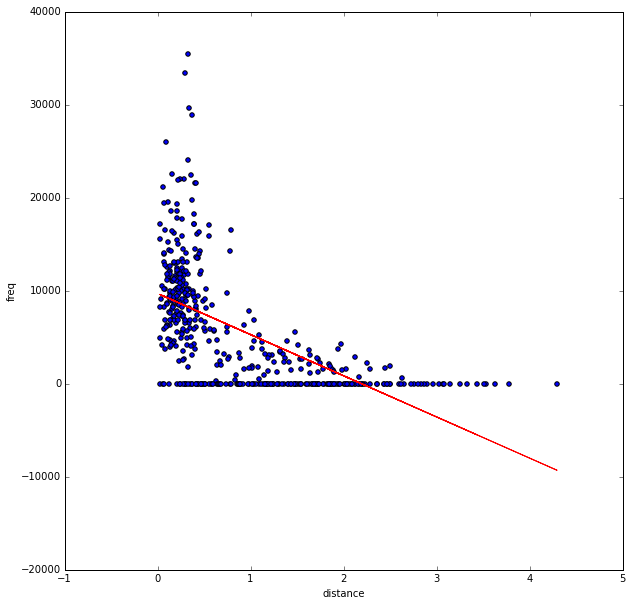

In [22]:
rgdata = pd.read_csv("distance-all.csv", index_col=0)
rgdata.head()
corr = stats.pearsonr(rgdata.distance,rgdata.freq)[0]
print('Correlation={0}'.format(corr))
rgdata.plot(kind='scatter',x='distance',y='freq')
lm = smf.ols(formula='freq ~ distance', data=rgdata).fit()
print (lm.summary())
lmy = lm.predict(rgdata)
plt.plot(rgdata.distance, lmy,'r-')

### Result:
The analysis above indicates a significant possibility that the distance between each station to the corresponding park has a correlation with the frequency of its Citibike usage. The result suggests a negative correlation between freq ~ distance such that as distance increases, frequency tends to be lower.

### Meanwhile, a p-value lower than 0.5 also suggests that the null hypothesis is rejected.